# Computational Project 3: PageRank

In this project, our goals are 
+ to learn about an application of linear algebra to the ranking of webpages, and 
+ to see eigenvectors and eigenvalues in action.


Please refer to the [demonstration](https://colab.research.google.com/drive/1FYv1OqM6BNE3-nJZQLyeLPRmenq0n0am) and the [Matrix Computation with Python and Numpy References](https://colab.research.google.com/drive/1v8wblwqZsbvhWbVfatXlrTE20oJhc2Mu) jupyter notebooks for examples and references on doing matrix computation with python.

## Background

The PageRank algorithm is a method for ranking the importance of webpages in search engine results.  The method is named after Larry Page, a Google co-founder.

The algorithm involves some neat linear algebra, which is explained in detail in Lecture 22.

While the method was invented for the purpose of ranking webpages, it has found a wide range of applications in other fields.  Here are some examples:
+ [An application of Google’s PageRank to NFL rankings](https://msp.org/involve/2012/5-4/involve-v5-n4-p07-s.pdf)
+ [Predicting species extinction using PageRank](https://www.wired.com/2009/09/googlefoodwebs/)
+ [Researchers fight toxic water with Google PageRank](http://www.wired.com/2012/02/google-pagerank-water)
+ [Assessing the relative performance of track athletes in competitions](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5456068/)
+ and many others

## Your Project

In this project, you will rank the importance of nodes in small directed graphs using PageRank.  Then, you will analyze characters in a literary work by representing them in a graph and computing the PageRank vector for this graph. 

### Part Zero: Setup

We will need to use the packages `numpy` and `scipy`.  **In the code cell below, please import them as `np` and `sp`, respectively**.

The packages `networkx`, `io`, and `requests` have also been imported so that we can work with data downloaded from the internet.  ***You do not need to modify codes involving these packages***

In [ ]:
# import numpy and scipy, then run the cell
import numpy as np
import scipy as sp
import csv

# Do not modify the code below the line 
#------------------------------------------------------- 
import networkx as nx
from io import BytesIO
import requests

### Part One

Suppose that the directed graph below is a network of webpages.  

<img src = "https://github.com/tiasondjaja/linearalgebra/raw/master/2019-spring-projectfiles/cp3-fig1.png" width="250">

**Your Tasks**

+ Specify the initial vector `v_0`.
+ Find the transition matrix $T$.  (Enter the entries of this matrix by hand )
+ Compute the PageRank vector in two ways:
  + Find all eigenvectors and eigenvalues of $T$ using `np.linalg.eig( MATRIXNAME )`
  + Compute the PageRank vector by computing the dominant eigenvector of $T$ **using the power method**
+ Comments and Interpretation <br>
<i>Keep in mind that there is no right answer to some of the questions below.  We just want you to tell us your interpretation of your results.</i>
  + What is PageRank vector which you found in the above computation?  Please interpret these numbers and list the "webpages"/vertices from most important to least important.
  + Does the ranking you found above make sense compared to what the graph looks like?  Before the PageRank vector was computed, which "webpage"/vertex would you guess to be most important?  Does it agree with the PageRank vector that you found?
  + When computing the PageRank vector using the power method, how many iterations  (i.e., how many times do you multiply $\vec v(0)$ by $T$?) did you carry out?  How did you decide when to stop?  Do you think that a lot of iterations were needed?

In [ ]:
# Your code for Part 1
#Specify the initial vector v_0.
v_0 = 1/5*np.ones((5,1))
print("The initial vector is:\n",v_0)

#Find the transition matrix  T
T = np.matrix([ [0,.5,0,0,.5],[1,0,0,0,.5],[0,.5,0,.5,0],[0,0,1,0,0],[0,0,0,.5,0]    ])
print("The transition matrix is:\n",T)

#Find all eigenvectors and eigenvalues of  T  
eigenvalues,eigenvectors=np.linalg.eig( T)
print("eigenvalues are:\n",eigenvalues)
print("eigenvectors are:\n",eigenvectors)


# using the power method to compute the PageRank vector
print("According to Power Method, the dominant eigenvector is:\n",T**70*v_0)




The initial vector is:
 [[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]
The transition matrix is:
 [[0.  0.5 0.  0.  0.5]
 [1.  0.  0.  0.  0.5]
 [0.  0.5 0.  0.5 0. ]
 [0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.5 0. ]]
eigenvalues are:
 [ 1.        +0.j         -0.76454276+0.12853293j -0.76454276-0.12853293j
  0.26454276+0.37146707j  0.26454276-0.37146707j]
eigenvectors are:
 [[-0.38411064+0.j          0.17083404+0.23988266j  0.17083404-0.23988266j
  -0.36217839-0.06088849j -0.36217839+0.06088849j]
 [-0.51214752+0.j          0.0878312 -0.25383688j  0.0878312 +0.25383688j
  -0.56945408+0.j         -0.56945408-0.j        ]
 [-0.51214752+0.j         -0.49371954+0.08300284j -0.49371954-0.08300284j
   0.06088849+0.20727569j  0.06088849-0.20727569j]
 [-0.51214752+0.j          0.645771  +0.j          0.645771  -0.j
   0.44767711+0.1549027j   0.44767711-0.1549027j ]
 [-0.25607376+0.j         -0.4107167 -0.06904862j -0.4107167 +0.06904862j
   0.42306688-0.30128991j  0.42306688+0.30128991j]]
According to Power 


[ YOUR ANSWER/INTERPRETATION FOR PART 1.  Double click this text to edit.  ]

1. What is PageRank vector which you found in the above computation? Please interpret these numbers and list the "webpages"/vertices from most important to least important.
The pagerank vector found was shown as below:

  
[[0.17647059]

 [0.23529412]
 
 [0.23529412]

 [0.23529412]

 [0.11764706]]

+ This is essentially a probability distribution of the random walk on the given graph. Each number represents the probability of a web-user's probability of landing at a page after a significant steps of random walk.

+ According to this interpretation, the most important webpage corresponds to the largest probability. In this case, the most relavent pages are page 2, 3 and 4(each with a probability of 0.24). The least relavent page is page 5(with probability of 0.12).

+  To conclude, the overall ranking from most important to the least important should be: 2=3=4>1>5.




2. Does the ranking you found above make sense compared to what the graph looks like? Before the PageRank vector was computed, which "webpage"/vertex would you guess to be most important? Does it agree with the PageRank vector that you found?
+ It makes sense comparing to the graph. Before computation, my intuition was that page 3 was the most important, instead of page 2,3,4 as having equally significant importance. My guess was based on that the number of arrows(references) towards a vertex is proportional to its importance. And since vertex 2 and 3 both have 2 directed edges pointing towards them, and vertex 2 is pointing further to 3, I guessed that page 3 should probably be a relavent source. Surprisingly, page 2,3,4 turned out to have the same importance, which is not easy to tell from sight. I think my predictions are not accurate enough because my first sight of a graph focused only on the direct relations, possibly ignoring potential changes during a large number of steps.





3. When computing the PageRank vector using the power method, how many iterations (i.e., how many times do you multiply  v⃗(0)  by  T ?) did you carry out? How did you decide when to stop? Do you think that a lot of iterations were needed?

+ I used 70 iterations. I decided to choose this number of times because it is sufficient many times for the result to converge to a stable vector, meanwhile it avoids too many iterations which could take more time and computing power.

### Part Two: 

Consider another graph below (this is the same graph as the one in question 3 in Homework 10):


<img src="https://github.com/tiasondjaja/linearalgebra/raw/master/2019-spring-projectfiles/cp3-fig3b.png" width = "350">

Note that this graph has a dangling node.  This means that once a websurfer reaches this node, they are "stuck" there and will be at any other pages in the next iterations.  Also note that since the graph has a dangling node, the transition matrix will not be column-stochastic, because the sum of the entries in the column that corresponds to the dangling node is zero.


**Your Tasks**
1. **Task 2A**
    + Find the transition matrix `T2` for this graph.  Then:
    + Try to find the dominant eigenvector of `T2` using the **power method**
    + Comments and Interpretation:
      + What is the result of using the power method to ?  Is this as we would expect?
+ **Task 2B: Handling dangling node(s)**
  + For each column whose entries are all 0's, replace the 0's with `1/n`'s (in this graph, $n = 8$).  Call this updated transition matrix `T3`
  + Find the dominant eigenvector of `T3` using the **power method**.
  + Comments and Interpretation:
    + How does updating the columns of all 0's change how the random web surfer behave when they reach a dangling node? 
    + Does this dominant eigenvector give you a ranking that you expected?
+ **Task 2C: Incorporating a "damping constant" $p$**
  + Choose a "damping constant" $p$, which can be any number in the interval $(0, 1)$, your choice.
  + Enter the matrix $M = pT_3 + (1-p)B$ where $T_3$ is the transition matrix found in Task 2B and $B$ is an $n\times n$ matrix whose entries are all $1/n$.
  + Find the PageRank vector for this graphs using $M$. 
  + Comments and Interpretation:
    + How does updating the columns of all 0's change how the random web surfer behave when they reach a dangling node? 
    + Does this dominant eigenvector give you a ranking that you expected?

In [ ]:
# Part 2A
#Find the transition matrix T2 for this graph
T2 = np.matrix([  [0,.5,.5,0,0,0,0,0],[0,0,0,0,1,0,0,0],[0,0,0,0,0,0,.5,1],[0,.5,0,0,0,0,0,0],[0,0,0,1,0,0,0,0],[0,0,.5,0,0,0,0,0],[0,0,0,0,0,1,0,0],[0,0,0,0,0,0,.5,0]    ])
print("The transition matrix for this graph:\n",T2)
# find the dominant eigenvector of T2 using the power method
x_0=1/8*np.ones((8,1))
print("The dominant eigenvector of T2 using power method is:\n", T2**30*x_0)


The transition matrix for this graph:
 [[0.  0.5 0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 1. ]
 [0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  1.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0. ]]
The dominant eigenvector of T2 using power method is:
 [[0.00042689]
 [0.00012207]
 [0.00050533]
 [0.00012207]
 [0.00012207]
 [0.00030482]
 [0.00037062]
 [0.00022829]]


[ YOUR COMMENT/INTERPRETATION FOR PART 2A.  Double click this text to edit.  ]

What is the result of using the power method to ? Is this as we would expect?
+ This is not completely as what I expected. The approximated eigenvector seems to not be column-stochastic. In fact, each entry is significantly smaller than what I expected.
+Also, node 1 seems to be overestimated, while node 2 seems to be underestimated.

In [ ]:
# Part 2B

T3 = np.matrix([  [1/8,.5,.5,0,0,0,0,0],[1/8,0,0,0,1,0,0,0],[1/8,0,0,0,0,0,.5,1],[1/8,.5,0,0,0,0,0,0],[1/8,0,0,1,0,0,0,0],[1/8,0,.5,0,0,0,0,0],[1/8,0,0,0,0,1,0,0],[1/8,0,0,0,0,0,.5,0]    ])
# finding dominant eigenvector using power method
print("The dominant eigenvector of T3 using power method is:\n", T3**60*x_0)
# ...






The dominant eigenvector of T3 using power method is:
 [[0.17391306]
 [0.13043481]
 [0.17391302]
 [0.08695656]
 [0.10869565]
 [0.10869564]
 [0.13043476]
 [0.08695651]]


[ YOUR COMMENT/INTERPRETATION FOR PART 2B.  Double click this text to edit.  ]

How does updating the columns of all 0's change how the random web surfer behave when they reach a dangling node?
Does this dominant eigenvector give you a ranking that you expected?
+ After updating the columns of all 0's, the web surfer will move on to take the next random step on the graph when they happen to reach a dangling node, instead of being trapped forever in node one.
+ This dominant eigenvector mostly conforms with my expectation, with node 1, 3, and 2 as the 3 most important nodes. However, I expected the probability ranking to be node1>3>2. 

In [ ]:
# Part 2C
#randomly choose a p in range (0,1)
p = 0.4
#construct a n*n matrix B with 1/n as its entries
B = 1/8*np.ones((8,8))
#construct a positive, column-stochastic matrix M
M = p*T3+(1-p)*B
#use power method to find the dominant eigenvector
print("The dominant eigenvector of M using power method is:\n", M**60*x_0)








The dominant eigenvector of M using power method is:
 [[0.13835285]
 [0.13201604]
 [0.15016   ]
 [0.10832085]
 [0.12524598]
 [0.11194964]
 [0.1266975 ]
 [0.10725714]]


[ YOUR COMMENT/INTERPRETATION FOR PART 2C.  Double click this text to edit.  ]

+ Taking the disconnectivity into account, we can see from the above probability vector that vertex 3 has the most importance, while the vertex 8 has the least importance.

### Part Three

PageRank was first introduced as a way to measure the importance of a webpage in an internet network.  However, we can think of it more generally as a way to measure the importance of nodes in any graph.

In the last part of our project, we will use page rank to examine the importance of characters in a book or a story. 

**We are interested in examining, using PageRank, which characters are most important**.  We will then see if PageRank gives us an answer that agrees with the actual plot of the book.

You have the choice of examining one of two stories:
+ Victor Hugo's ***Les Miserables*** or
+ George R.R. Martin's ***Game of Thrones***




PLEASE INDICATE YOUR CHOICE HERE.

(You can investigate both, but I will only grade one of them.  If not specified, I'll grade the first one that you attempted.)

**CHOICE: Victor Hugo's Les Miserables**

### Part 3, Choice 1: Les Miserables

<img src="https://images-na.ssl-images-amazon.com/images/I/51Ca4F2bS5L.jpg" height="300">

#### The Data
The file lesmis.gml contains the weighted network of coappearances of characters in Victor Hugo's novel ***Les Miserables***.

We have included the data in the cell code below.  We have also included a code that draws the **"co-appearance graph"** of the characters in the book:
  + Nodes: characters in the book.
  + Edges: there is an edge between two nodes if the two characters appear together and interact in a scene.
  + The original data has more information, but we are keeping things a little simpler in this project.

*Source: UC Irvine Network Data Repository.  The data on coappearances were taken from D. E. Knuth, The Stanford GraphBase: A Platform for Combinatorial Computing, Addison-Wesley, Reading, MA (1993).*


**Your Tasks**

We have provided the adjacency matrix for the graph.
1. Run the provided codes for downloading the data and obtaining the transtion matrix for the graph.  The code also prints out the numbers of rows and columns of the transition matrix `T_lesmis`.  You can use this information to determine the number of characters represented in the graph.
2. Find the PageRank vector using the power method.  We leave it to you to determine how many iterations would suffice to find the dominant eigenvector for $T$.
3. Find the largest 3 numbers in the PageRank vector; please note the corresponding indices (the first element in the eigenvector has index 0, the second element has index 1, etc.)
4. Identify the names of the characters that are most important (see the provided code cell near the end of this document).
5. **Comments and Interpretation**: 
  + If you are not familiar with the story, you can read [this Wikipedia page](https://en.wikipedia.org/wiki/Les_Mis%C3%A9rables#Major) to find out who the major characters in the book are.
  + How many characters are represented in this graph?
  + Does it make sense that the three characters you identified in Question 4 above are most important?  Why or why not?  
  + Do you think that PageRank is a pretty good way to measure the importance of nodes in a graph in general (in non-websearch applications) ?


['Myriel', 'Napoleon', 'MlleBaptistine', 'MmeMagloire', 'CountessDeLo', 'Geborand', 'Champtercier', 'Cravatte', 'Count', 'OldMan', 'Labarre', 'Valjean', 'Marguerite', 'MmeDeR', 'Isabeau', 'Gervais', 'Tholomyes', 'Listolier', 'Fameuil', 'Blacheville', 'Favourite', 'Dahlia', 'Zephine', 'Fantine', 'MmeThenardier', 'Thenardier', 'Cosette', 'Javert', 'Fauchelevent', 'Bamatabois', 'Perpetue', 'Simplice', 'Scaufflaire', 'Woman1', 'Judge', 'Champmathieu', 'Brevet', 'Chenildieu', 'Cochepaille', 'Pontmercy', 'Boulatruelle', 'Eponine', 'Anzelma', 'Woman2', 'MotherInnocent', 'Gribier', 'Jondrette', 'MmeBurgon', 'Gavroche', 'Gillenormand', 'Magnon', 'MlleGillenormand', 'MmePontmercy', 'MlleVaubois', 'LtGillenormand', 'Marius', 'BaronessT', 'Mabeuf', 'Enjolras', 'Combeferre', 'Prouvaire', 'Feuilly', 'Courfeyrac', 'Bahorel', 'Bossuet', 'Joly', 'Grantaire', 'MotherPlutarch', 'Gueulemer', 'Babet', 'Claquesous', 'Montparnasse', 'Toussaint', 'Child1', 'Child2', 'Brujon', 'MmeHucheloup']


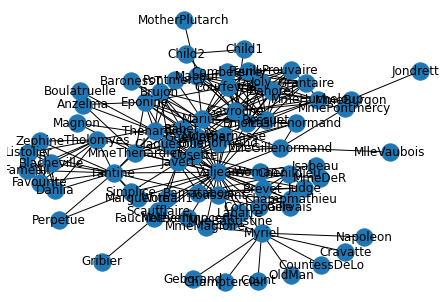

In [ ]:
# Part 3: Obtain the data
# DO NOT MODIFY THIS CELL

# Download the data
#   make sure that you've run the setup cells in Part 0 before running this cell
lesmis_url = 'http://networkdata.ics.uci.edu/data/lesmis/lesmis.gml' 
response = requests.get(lesmis_url)

# Specify the graph
G_lesmis = nx.read_gml(BytesIO(response.content))

# print the list of nodes
print(G_lesmis.nodes())

# Draw the co-appearance graph
layout = nx.drawing.nx_pydot.pydot_layout(G_lesmis)
nx.draw(G_lesmis, pos = layout)
labels_lesmis =nx.draw_networkx_labels(G_lesmis, pos=layout, size=9)
# The labeling isn't super clear; that's okay.  
#     This is just to give us a rough sense of what the graph looks like)


In [ ]:
# Part 3, continued: Compute PageRank vector

# Obtaining the transition matrix
T_lesmis = np.matrix( nx.google_matrix(G_lesmis) ) .T# no need to modify this line

# below we prints the numbers of rows and columns of T_lesmis
#  How many characters are represented in this graph?
print(T_lesmis.shape) 

(77, 77)


In [ ]:
# Part 3, continued

# Find the PageRank vector using Power Method:
x_1=1/77*np.ones( (77,1))
v = T_lesmis**50*x_1


In [ ]:
# Part 3, continued: Identify the top N most important characters

print(v)

# then, identify the index of each of the 3 most important characters

ranking=[]
for i in range(77):
  ranking.append(v[i,0])
new=ranking.copy()
print("copy list:",new)
new.sort()

print("The 3 greatest values among all entries are:", new[-1],new[-2],new[-3])
print("They corresponds to index:",ranking.index(new[-1]),ranking.index(new[-2]),ranking.index(new[-3]))


# ------------------------------------------------
# Do not modify below the line
# The code below tells us the characters that corresponds to the indices


name_lesmis = list(labels_lesmis.keys())

list(enumerate(name_lesmis))

print("The index further corresponds to these 3 characters:",name_lesmis[11],name_lesmis[0],name_lesmis[48])

[[0.04277931]
 [0.0055843 ]
 [0.01027714]
 [0.01027714]
 [0.0055843 ]
 [0.0055843 ]
 [0.0055843 ]
 [0.0055843 ]
 [0.0055843 ]
 [0.0055843 ]
 [0.00372904]
 [0.07543013]
 [0.00526033]
 [0.00372904]
 [0.00372904]
 [0.00372904]
 [0.01564743]
 [0.0126182 ]
 [0.0126182 ]
 [0.0126182 ]
 [0.0126182 ]
 [0.0126182 ]
 [0.0126182 ]
 [0.02702271]
 [0.01950113]
 [0.02792652]
 [0.02061121]
 [0.03030274]
 [0.01163805]
 [0.01557627]
 [0.00540749]
 [0.00907365]
 [0.00372904]
 [0.00524418]
 [0.01242466]
 [0.01242466]
 [0.01242466]
 [0.01242466]
 [0.01242466]
 [0.0073681 ]
 [0.00343165]
 [0.01779391]
 [0.00631354]
 [0.00683686]
 [0.00620213]
 [0.00442114]
 [0.00526542]
 [0.00780558]
 [0.03576731]
 [0.01495747]
 [0.00527122]
 [0.01626021]
 [0.00601013]
 [0.00392251]
 [0.0087136 ]
 [0.03089493]
 [0.00514646]
 [0.01747802]
 [0.02188203]
 [0.01589212]
 [0.01314588]
 [0.01589212]
 [0.01857844]
 [0.01719987]
 [0.01895952]
 [0.01719987]
 [0.01445666]
 [0.00329863]
 [0.01669184]
 [0.01669184]
 [0.01656102]
 [0.01


[ YOUR ANSWER FOR PART 3.  Double click this text to edit.  Type here the answer of the above questions, which you obtain by doing the computation in the above code cell.]

If you are not familiar with the story, you can read this Wikipedia page to find out who the major characters in the book are.

+ The major characters are: Jean Valjean, Javert, Fantine, Cosette, Marius Pontmercy, Éponine, Monsieur Thénardier and Madame Thénardier, Enjolras,Gavroche, Bishop Myriel, and Grantaire.


How many characters are represented in this graph?

+ There are 77 characters in this graph, since there are 77 rows/columns in the transition matrix, meaning that there are are 77 nodes in the graph.



Does it make sense that the three characters you identified in Question 4 above are most important? Why or why not?

+ It makes sense they are important. Since Valjean is the protagonist of the novel, appearing most frequently; next to him is Myriel, who inspires Valjean to change his ways; the third-important one is Gavroche, who is also a member of the main characters.


Do you think that PageRank is a pretty good way to measure the importance of nodes in a graph in general (in non-websearch applications) ?
+ I think it could be potentially very powerful tool, but should probably be used with extra attention, especially about the user privacy issues. For example, more and more apps and platforms nowdays(music-streaming apps, online video platforms, news, social media apps, shopping apps,etc) develop "customized contents", using hashtags and labels to rank contents that maps our preferences, or in other words, "of the greatest importance to ourselves". Although this boosts customer experience and maximizes the economic profits, the practice of PageRank could collect a large amount of personal data, if not privacy, from users. This poses a challenge for the firms to keep every user's data secure.
+ PageRank could also be biased in some sense. Although it saves the users significant amount of time searching every link themselves, it potentially drowns many new-born ideas. The popular link automatically gets topped so that it gets more popular easily, while recent, vibrant ideas are hard to get seen and surpass the old ones, and thus get referenced. This establishes an underlying authority that emphasizes on popularity and discourages new hypothesis, or worse, neglect new but important opinions. While "relevance" could determine importance, it is not everything and certainly does not completely equal to the quality of ideas. It would be really good if newly generated ideas are viewed and considered by people promptly so that nothing valuable is ignored.

### Part 3, Choice 2: Game of Thrones

<img src="https://images-na.ssl-images-amazon.com/images/I/914uNuOXwSL.jpg" height="300">




#### The Data
The file stormofswords.csv that we download and process in the code cell below contains the weighted network of coappearances of characters in George R.R. Martin's series of ***Game of Thrones*** novels.

We have included the data in the cell code below.  We have also included a code that draws the **"co-appearance graph"** of the characters in the book:
  + Nodes: characters in the book (specifically, from the third book in the series, *A Storm of Swords*).  There are 107 of characters.
  + Edges: there is an edge between two nodes if the two characters appear together and interact in a scene.
  + The original data has more information (the edges are "weighted"), but we are keeping things a little simpler in this project.

*Source and Reference:*
+ *Andrew Beveridge, Macalester College, https://www.macalester.edu/~abeverid/thrones.html*
+ [*A. Beveridge and J. Shan, "Network of Thrones," Math Horizons Magazine , Vol. 23, No. 4 (2016), pp. 18-22*](https://www.maa.org/sites/default/files/pdf/Mathhorizons/NetworkofThrones%20%281%29.pdf)
+ Original dataset: https://www.macalester.edu/~abeverid/data/stormofswords.csv.  The datset that we use in this project is very slightly reformatted from this original one, in order to make it readable by the python package that we are using.

**Your Tasks**

We have provided the adjacency matrix for the graph.
1. Using the adjacency matrix, please specify the transition matrix for the graph.
2. Find the PageRank vector using the power method.  We leave it to you to determine how many iterations would suffice to find the dominant eigenvector for $T$.
3. Find the largest 3 numbers in the PageRank vector; please note the corresponding indices (the first element in the eigenvector has index 0, the second element has index 1, etc.)
4. Identify the names of the characters that are most important (see the provided code cell near the end of this document).
5. **Comments and Interpretation**: 
  + If you are not familiar with the story, you can read [this Wikipedia page](https://en.wikipedia.org/wiki/Game_of_Thrones#Cast_and_characters) to find out who the major characters in the book are.
  + Does it make sense that the three characters you identified in Question 4 above are most important?  Why or why not?  
  + Do you think that PageRank is a pretty good way to measure the importance of nodes in a graph in general (in non-websearch applications) ?


['Aemon', 'Grenn', 'Samwell', 'Aerys', 'Jaime', 'Robert', 'Tyrion', 'Tywin', 'Alliser', 'Mance', 'Amory', 'Oberyn', 'Arya', 'Anguy', 'Beric', 'Bran', 'Brynden', 'Cersei', 'Gendry', 'Gregor', 'Joffrey', 'Jon', 'Rickon', 'Roose', 'Sandor', 'Thoros', 'Balon', 'Loras', 'Belwas', 'Barristan', 'Illyrio', 'Hodor', 'Jojen', 'Luwin', 'Meera', 'Nan', 'Theon', 'Brienne', 'Bronn', 'Podrick', 'Lothar', 'Walder', 'Catelyn', 'Edmure', 'Hoster', 'Jeyne', 'Lysa', 'Petyr', 'Robb', 'Roslin', 'Sansa', 'Stannis', 'Elia', 'Ilyn', 'Meryn', 'Pycelle', 'Shae', 'Varys', 'Craster', 'Karl', 'Daario', 'Drogo', 'Irri', 'Daenerys', 'Aegon', 'Jorah', 'Kraznys', 'Missandei', 'Rakharo', 'Rhaegar', 'Viserys', 'Worm', 'Davos', 'Cressen', 'Salladhor', 'Eddard', 'Eddison', 'Gilly', 'Qyburn', 'Renly', 'Tommen', 'Janos', 'Bowen', 'Kevan', 'Margaery', 'Myrcella', 'Dalla', 'Melisandre', 'Orell', 'Qhorin', 'Rattleshirt', 'Styr', 'Val', 'Ygritte', 'JonArryn', 'Lancel', 'Olenna', 'Marillion', 'RobertArryn', 'Ellaria', 'Mace', 'Ri

TypeError: ignored

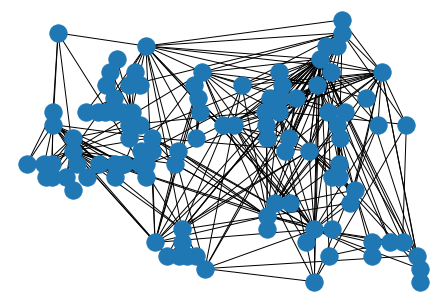

In [ ]:
# Part 3: Obtain the data


# Download the data
got_url = 'https://raw.githubusercontent.com/tiasondjaja/linearalgebra/master/2019-spring-projectfiles/stormofswords3.csv' 
response = requests.get(got_url)

# Specify the graph
G_got=nx.read_edgelist(BytesIO(response.content) )

# print the list of nodes
print(G_got.nodes())

# Draw the co-appearance graph
layout = nx.drawing.nx_pydot.pydot_layout(G_got, prog='dot')
nx.draw(G_got, pos = layout)
labels_got=nx.draw_networkx_labels(G_got,pos=layout, size=9)
# The labeling isn't super clear; that's okay.  
#     This is just to give us a rough sense of what the graph looks like)


In [ ]:
# Part 3, continued: The transition matrix

# Obtaining the transition matrix
T_got = np.matrix( nx.google_matrix(G_got) ).T # no need to modify this line

# The line below prints the numbers of rows and columns of A, for checking correctness
#   How many characters are represented in the graph?
print(T_got.shape)

(107, 107)


In [ ]:
# Part 3, continued:

# Find the PageRank vector using Power Method:

v_0 = 1/107*np.ones((107,1))
v=T_got**50*v_0


In [ ]:
# Part 3, continued: Identify the top N most important characters
print(v)

# then, identify the index of each of the 3 most important characters
ranking=[]
for i in range(107):
  ranking.append(v[i,0])
new=ranking.copy()
print("copy list:",new)
new.sort()
print(new)

print("The 3 greatest values among all entries are:", new[-1],new[-2],new[-3])
print("They corresponds to index:",ranking.index(new[-1]),ranking.index(new[-2]),ranking.index(new[-3]))

# ------------------------------------------------
# Do not modify below the line
# The code below tells us the characters that corresponds to the indices

name_got = list(labels_got.keys())
list(enumerate(name_got))
print("The index further corresponds to these 3 characters:",name_got[6],name_got[21],name_got[63])


[[0.00785144]
 [0.0086652 ]
 [0.02827748]
 [0.00459788]
 [0.03661028]
 [0.0140502 ]
 [0.05545692]
 [0.02108112]
 [0.0042906 ]
 [0.01714376]
 [0.00198255]
 [0.01038396]
 [0.02554164]
 [0.00265565]
 [0.00807349]
 [0.02902276]
 [0.00671807]
 [0.02152906]
 [0.00630421]
 [0.01272988]
 [0.02424096]
 [0.0448553 ]
 [0.00784801]
 [0.00282147]
 [0.01324093]
 [0.00660659]
 [0.00396291]
 [0.00842658]
 [0.01217031]
 [0.01029843]
 [0.00294586]
 [0.01397894]
 [0.01026234]
 [0.00233023]
 [0.01127128]
 [0.0033962 ]
 [0.00447298]
 [0.01190822]
 [0.00661569]
 [0.00703586]
 [0.0046507 ]
 [0.00961714]
 [0.01865991]
 [0.01100968]
 [0.00362505]
 [0.00379115]
 [0.01245072]
 [0.00930059]
 [0.03413911]
 [0.00447578]
 [0.0363688 ]
 [0.0168185 ]
 [0.00435675]
 [0.00419263]
 [0.00549635]
 [0.00353495]
 [0.0058851 ]
 [0.00618194]
 [0.0092358 ]
 [0.0020299 ]
 [0.00602748]
 [0.00684701]
 [0.00665515]
 [0.0410343 ]
 [0.0026046 ]
 [0.0149369 ]
 [0.00290528]
 [0.00599643]
 [0.00245426]
 [0.00731502]
 [0.0039831 ]
 [0.00


[ YOUR ANSWER FOR PART 3.  Double click this text to edit.  Type here the answer of the above questions, which you obtain by doing the computation in the above code cell.]

[ YOUR ANSWER HERE.  Double click this text to edit]

In [ ]:
#Project the big bang theory scenario: who will be chosen?

#encode the transition matrix
T_tbbt=np.matrix([[0,0,1/2,1/2],[1,0,0,1/2],[0,1/2,0,0],[0,1/2,1/2,0]])
#identify initial vector
v0=1/4*np.ones((4,1))
#calculate the dominant eigenvector after random walks
#iteration 1
v1=T_tbbt*v0

#iteration 2
v2=T_tbbt**2*v0

#iteratoin 50
v50=T_tbbt**50*v0
print(v1)
print()
print(v2)
print()
print(v50)


[[0.25 ]
 [0.375]
 [0.125]
 [0.25 ]]

[[0.1875]
 [0.375 ]
 [0.1875]
 [0.25  ]]

[[0.21739123]
 [0.34782607]
 [0.17391311]
 [0.26086959]]


## Reflections

Please briefly write:
1. One new thing that you learn from this project

I learned from the project that page rank saves our time by analyzing the relations among a large array of things. And to simulate a web surfer's browse on the internet, we use matrix to calculate weighted probability of reaching a link after a significant steps of random walk.

2. One aspect of this project that you found most interesting OR most challenging OR both.

The most challenging part is understanding the reasons and geometric meanings of our manipulations to handle dangling nodes or disconnected graphs. I see that they help to undermine the biased data that might result from being stuck in a certain dangling node or a certain branch of the graph, but the complete reasoning behind the computation is still a bit vague to me. (for example, what problems could disconnected graph generate without matrix M? How would M help solve these exactly? )


3. If you discuss any part of the project with anyone ( classmate(s), tutor(s), etc.), please ackowledge them here.